1. Load and Profile Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os
from io import StringIO
from scipy.stats import zscore

In [20]:

# Replace with your dataset path, e.g., 'benin-solar-data.csv'
df = pd.read_csv('../data/benin-solar-data.csv', encoding='latin1')
# Display first 5 rows
print(df.head())
# Column names and data types
print(df.info())

/tmp/ipykernel_1532238/362309940.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/benin-solar-data.csv', encoding='latin1')


          Timestamp   GHI   DNI   DHI  ModA  ModB  Tamb    RH   WS WSgust  \
0  yyyy-mm-dd hh:mm  W/m²  W/m²  W/m²  W/m²  W/m²    °C     %  m/s    m/s   
1  2021-08-09 00:01  -1.2  -0.2  -1.1     0     0  26.2  93.4    0    0.4   
2  2021-08-09 00:02  -1.1  -0.2  -1.1     0     0  26.2  93.6    0      0   
3  2021-08-09 00:03  -1.1  -0.2  -1.1     0     0  26.2  93.7  0.3    1.1   
4  2021-08-09 00:04  -1.1  -0.1    -1     0     0  26.2  93.3  0.2    0.7   

  WSstdev            WD WDstdev   BP Cleaning Precipitation TModA TModB  \
0     m/s  °N (to east)       °  hPa   1 or 0        mm/min    °C    °C   
1     0.1         122.1       0  998        0             0  26.3  26.2   
2       0             0       0  998        0             0  26.3  26.2   
3     0.5         124.6     1.5  997        0             0  26.4  26.2   
4     0.4         120.3     1.3  997        0             0  26.4  26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<c

2. Summary Statistics & Missing-Value Report

In [21]:
# Summary statistics for numeric columns
print(df.describe())
# Missing value counts
print(df.isna().sum())
# Percentage of missing values
missing_percent = df.isna().mean() * 100
print("\nColumns with >5% missing values:")
print(missing_percent[missing_percent > 5])

       Comments
count       0.0
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525601
dtype: int64

Columns with >5% missing values:
Comments    100.0
dtype: float64


3. Outlier Detection and Basic Cleaning

In [ ]:


# Columns to check for outliers
cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Ensure the columns are numeric
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

# Calculate Z-scores
z_scores = df[cols].apply(zscore, nan_policy="omit")

# Flag rows where any |Z| > 3
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of rows with outliers (|Z| > 3): {outliers.sum()}")

# Display outlier rows (optional)
print(df[outliers].head())

Number of rows with outliers (|Z| > 3): 7740
            Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
671  2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2  3.2   
672  2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
673  2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4  3.4   
674  2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2  4.7   
675  2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   

     WSgust WSstdev     WD WDstdev   BP Cleaning Precipitation TModA TModB  \
671     4.1     0.7  190.5    18.4  999        0             0    63  52.7   
672     4.1     0.6  175.8    13.3  999        0             0  63.7  53.1   
673     4.6     0.9  171.5    11.9  999        0             0  65.8  54.3   
674     5.6     0.6  160.7       8  999        0             0  65.4  54.2   
675     4.6     0.4  169.1    12.3  999        0             0    65  53.5   

     

In [26]:
#Handle Missing Values:
# Impute missing values with median for key columns
for col in cols:
    if df[col].isna().mean() < 0.05:  # Less than 5% missing
        df[col].fillna(df[col].median(), inplace=True)
    else:
        print(f"{col} has >5% missing, review before imputing.")
# Drop rows with missing values in critical columns (if needed)
df.dropna(subset=['GHI', 'DNI', 'DHI'], inplace=True)
# Verify no missing values in key columns
print(df[cols].isna().sum())

/tmp/ipykernel_1532238/1144182097.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_1532238/1144182097.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [27]:
#Export Cleaned Data:
# Save cleaned DataFrame
df.to_csv('../data/benin_clean.csv', index=False)
print("Cleaned data saved to data/benin_clean.csv")

Cleaned data saved to data/benin_clean.csv


3. Time Series Analysis

In [30]:
# Convert Timestamp:
# Filter out invalid datetime strings
df = df[df['Timestamp'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}', na=False)]
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dropna(subset=['Timestamp'], inplace=True)
df.set_index('Timestamp', inplace=True)

/home/emran/devspace/miscellaneous/solar-challenge-week1/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


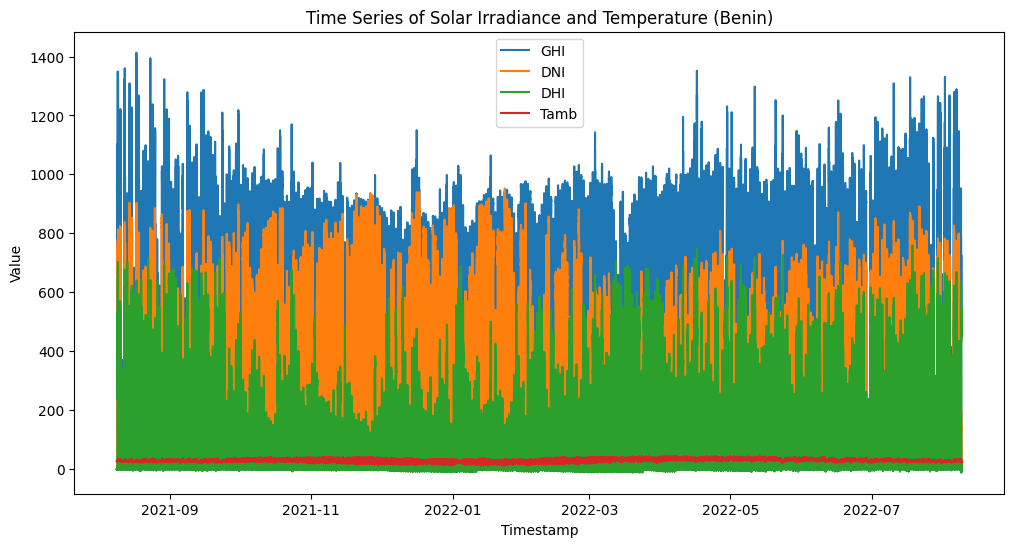

In [32]:
#Line Plot:
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure columns are numeric
numeric_cols = ['GHI', 'DNI', 'DHI', 'Tamb']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Plot GHI, DNI, DHI, Tamb
plt.figure(figsize=(12, 6))
for col in numeric_cols:
    plt.plot(df.index, df[col], label=col)
plt.title('Time Series of Solar Irradiance and Temperature (Benin)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

4. Cleaning Impact

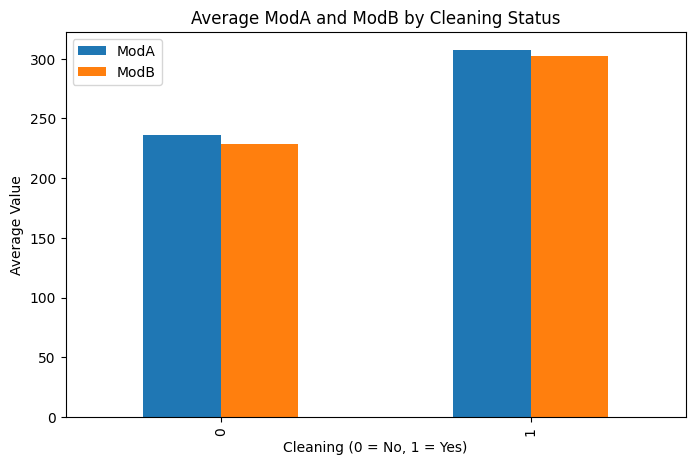

In [18]:
# Group by Cleaning flag and compute averages
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
# Plot
cleaning_impact.plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB by Cleaning Status')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Average Value')
plt.show()

5.  Correlation and Relationship Analysis 

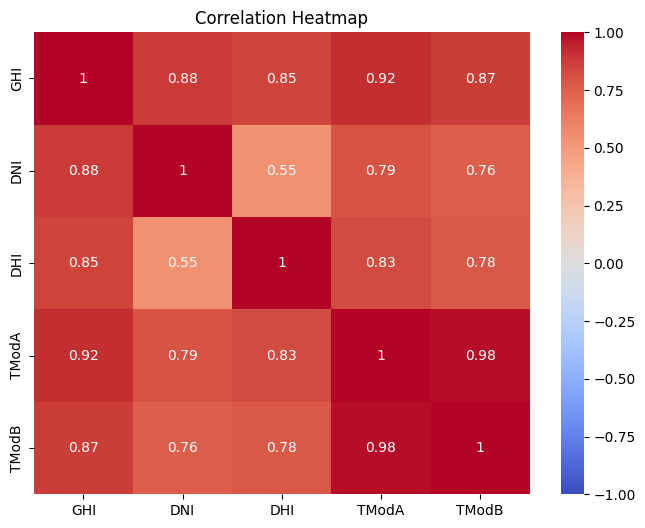

In [19]:
# Correlation Heatmap:
# Correlation matrix
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

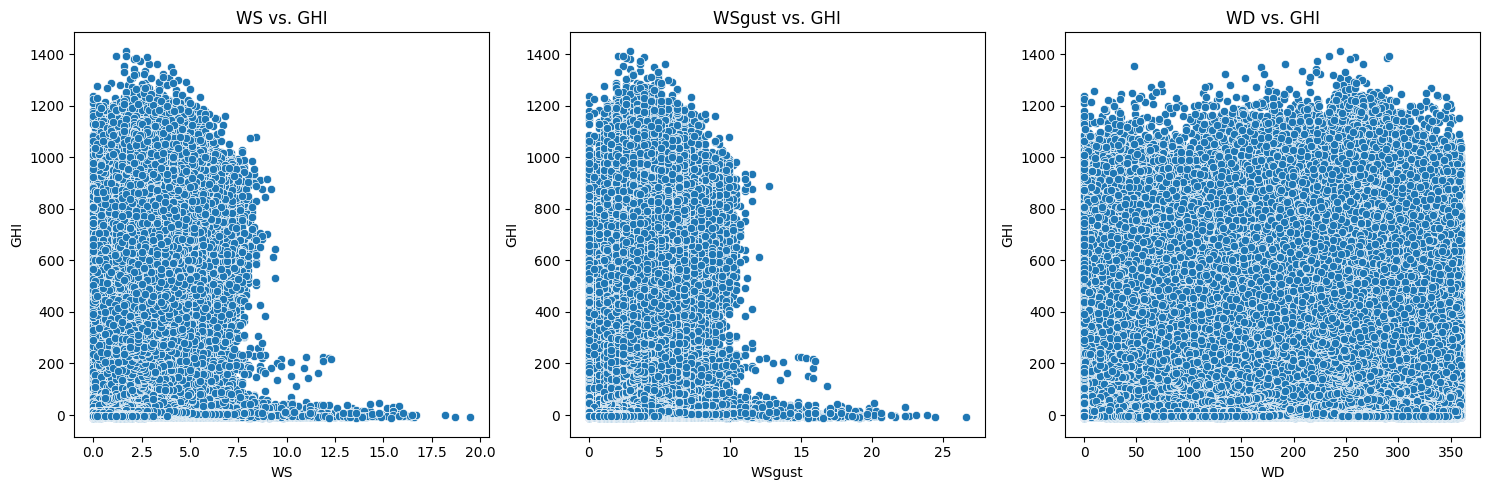

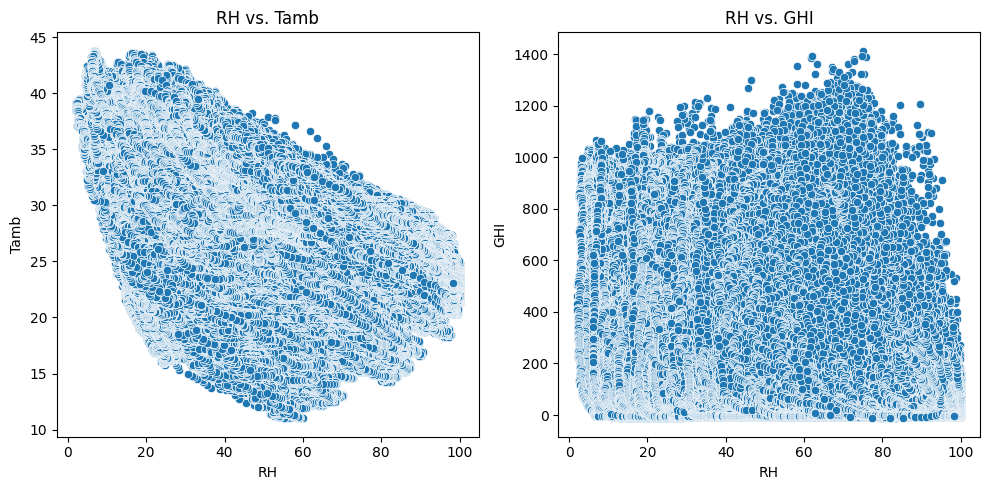

In [20]:
#Scatter Plots:
# Scatter plots: WS, WSgust, WD vs. GHI
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('WS vs. GHI')
plt.subplot(1, 3, 2)
sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.title('WSgust vs. GHI')
plt.subplot(1, 3, 3)
sns.scatterplot(x='WD', y='GHI', data=df)
plt.title('WD vs. GHI')
plt.tight_layout()
plt.show()
# RH vs. Tamb and RH vs. GHI
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs. Tamb')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('RH vs. GHI')
plt.tight_layout()
plt.show()

6. Wind and Distribution Analysis

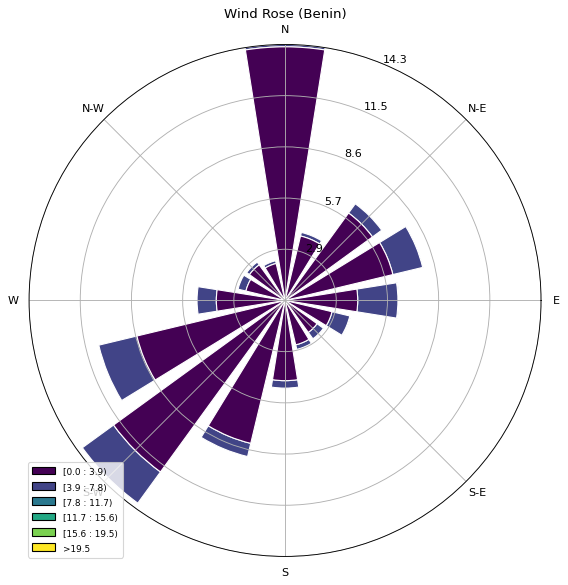

In [21]:
#Wind Rose:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose (Benin)')
plt.show()

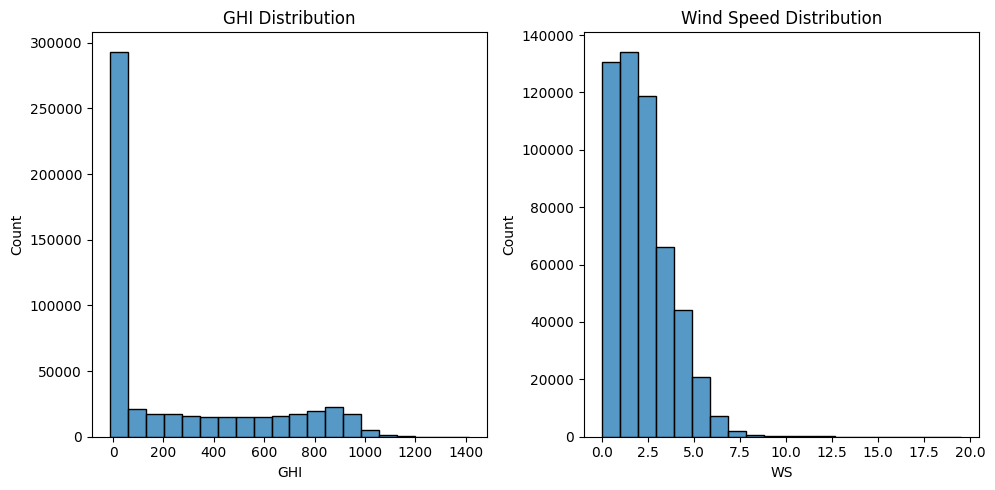

In [22]:
# Histograms:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], bins=20)
plt.title('GHI Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['WS'], bins=20)
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

7.  Temperature Analysis

- Scatter plots shows when RH increases the Tamb decreases
- Further analysis could involve regression to quantify RH’s impact.

8. Bubble Chart

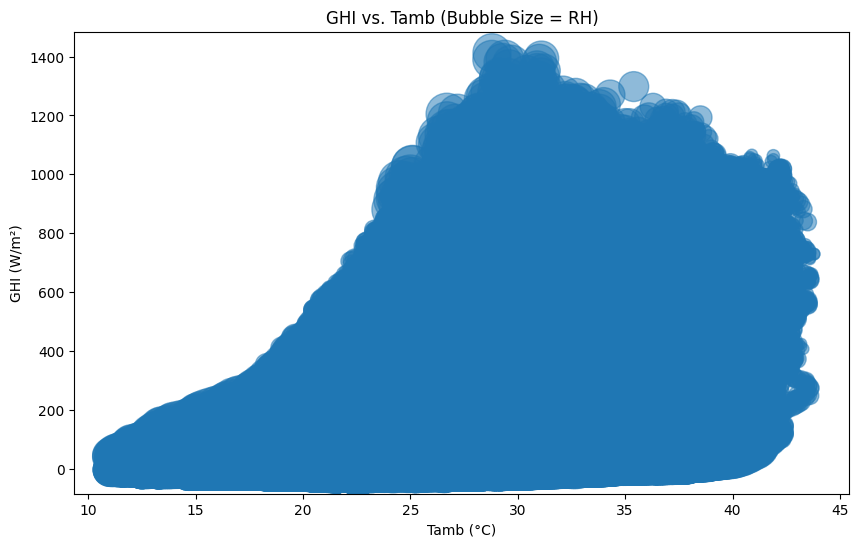

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5)
plt.title('GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m²)')
plt.show()